In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Customer_data = pd.read_excel('Data_HackLab.xlsx')
Customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Initial exploration

In [91]:
print(type(Customer_data)) #verify its a dataframe
Customer_data.head()
print(Customer_data.shape) #7043 rows and 21 columns
Customer_data.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### Modify data types of some columns

In [97]:
# Convert 'TotalCharges' to float
Customer_data['TotalCharges'] = pd.to_numeric(Customer_data['TotalCharges'], errors='coerce')

# Verify the data type and check for missing values
print(Customer_data['TotalCharges'].dtype)
print(Customer_data['TotalCharges'].isnull().sum())

Customer_data.dtypes

# Get the list of columns in the DataFrame
columns_list = Customer_data.columns.tolist()
Customer_data["customerID"] = Customer_data["customerID"].astype(str)
Customer_data["TotalCharges"] = Customer_data["TotalCharges"].astype(float)

Customer_data.dtypes #data types are correct now

#print(Customer_data.describe())

float64
11


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Counts for categorical values

In [ ]:
# Exclude customerID from categorical columns (and any other columns you don't want to include)
categorical_columns = Customer_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove 'customerID' or any unique identifier columns from the list of categorical columns
categorical_columns = [col for col in categorical_columns if col != 'customerID' and col != 'MonthlyCharges' and col != 'TotalCharges']

# Handle boolean columns separately (as they are encoded as True/False)
boolean_columns = Customer_data.select_dtypes(include=['bool']).columns.tolist()

# Merge boolean columns with categorical ones, excluding customerID
categorical_columns += boolean_columns

for col in categorical_columns:
    print(f"Proportions for {col}:")
    print(Customer_data[col].value_counts(normalize=True))
    print("-" * 50)  

### Correlation plot for numerical variables

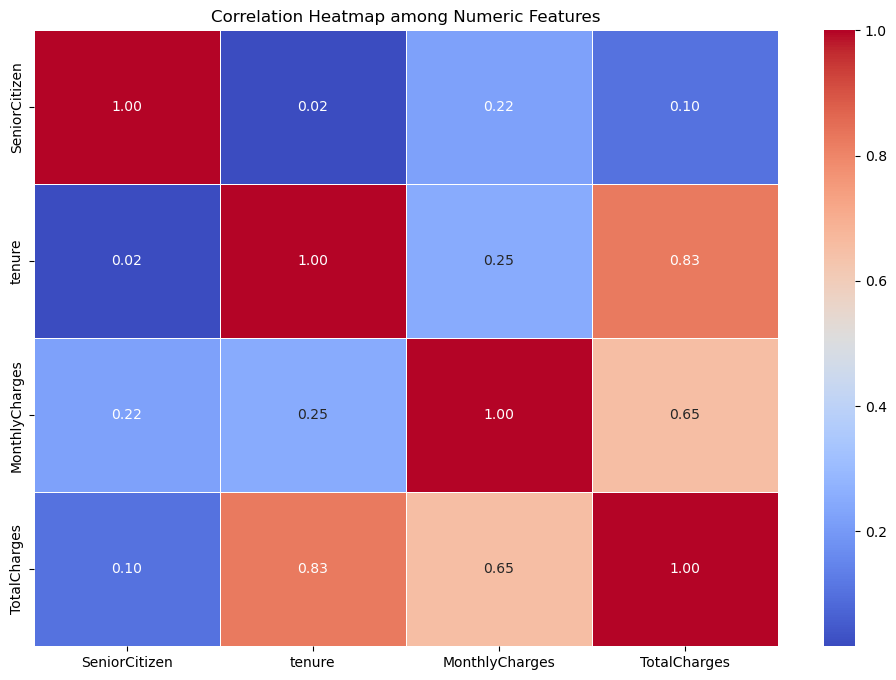

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = Customer_data.select_dtypes(include=['number']).columns

correlation_matrix = Customer_data[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Heatmap among Numeric Features")
plt.show()

In [104]:
categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

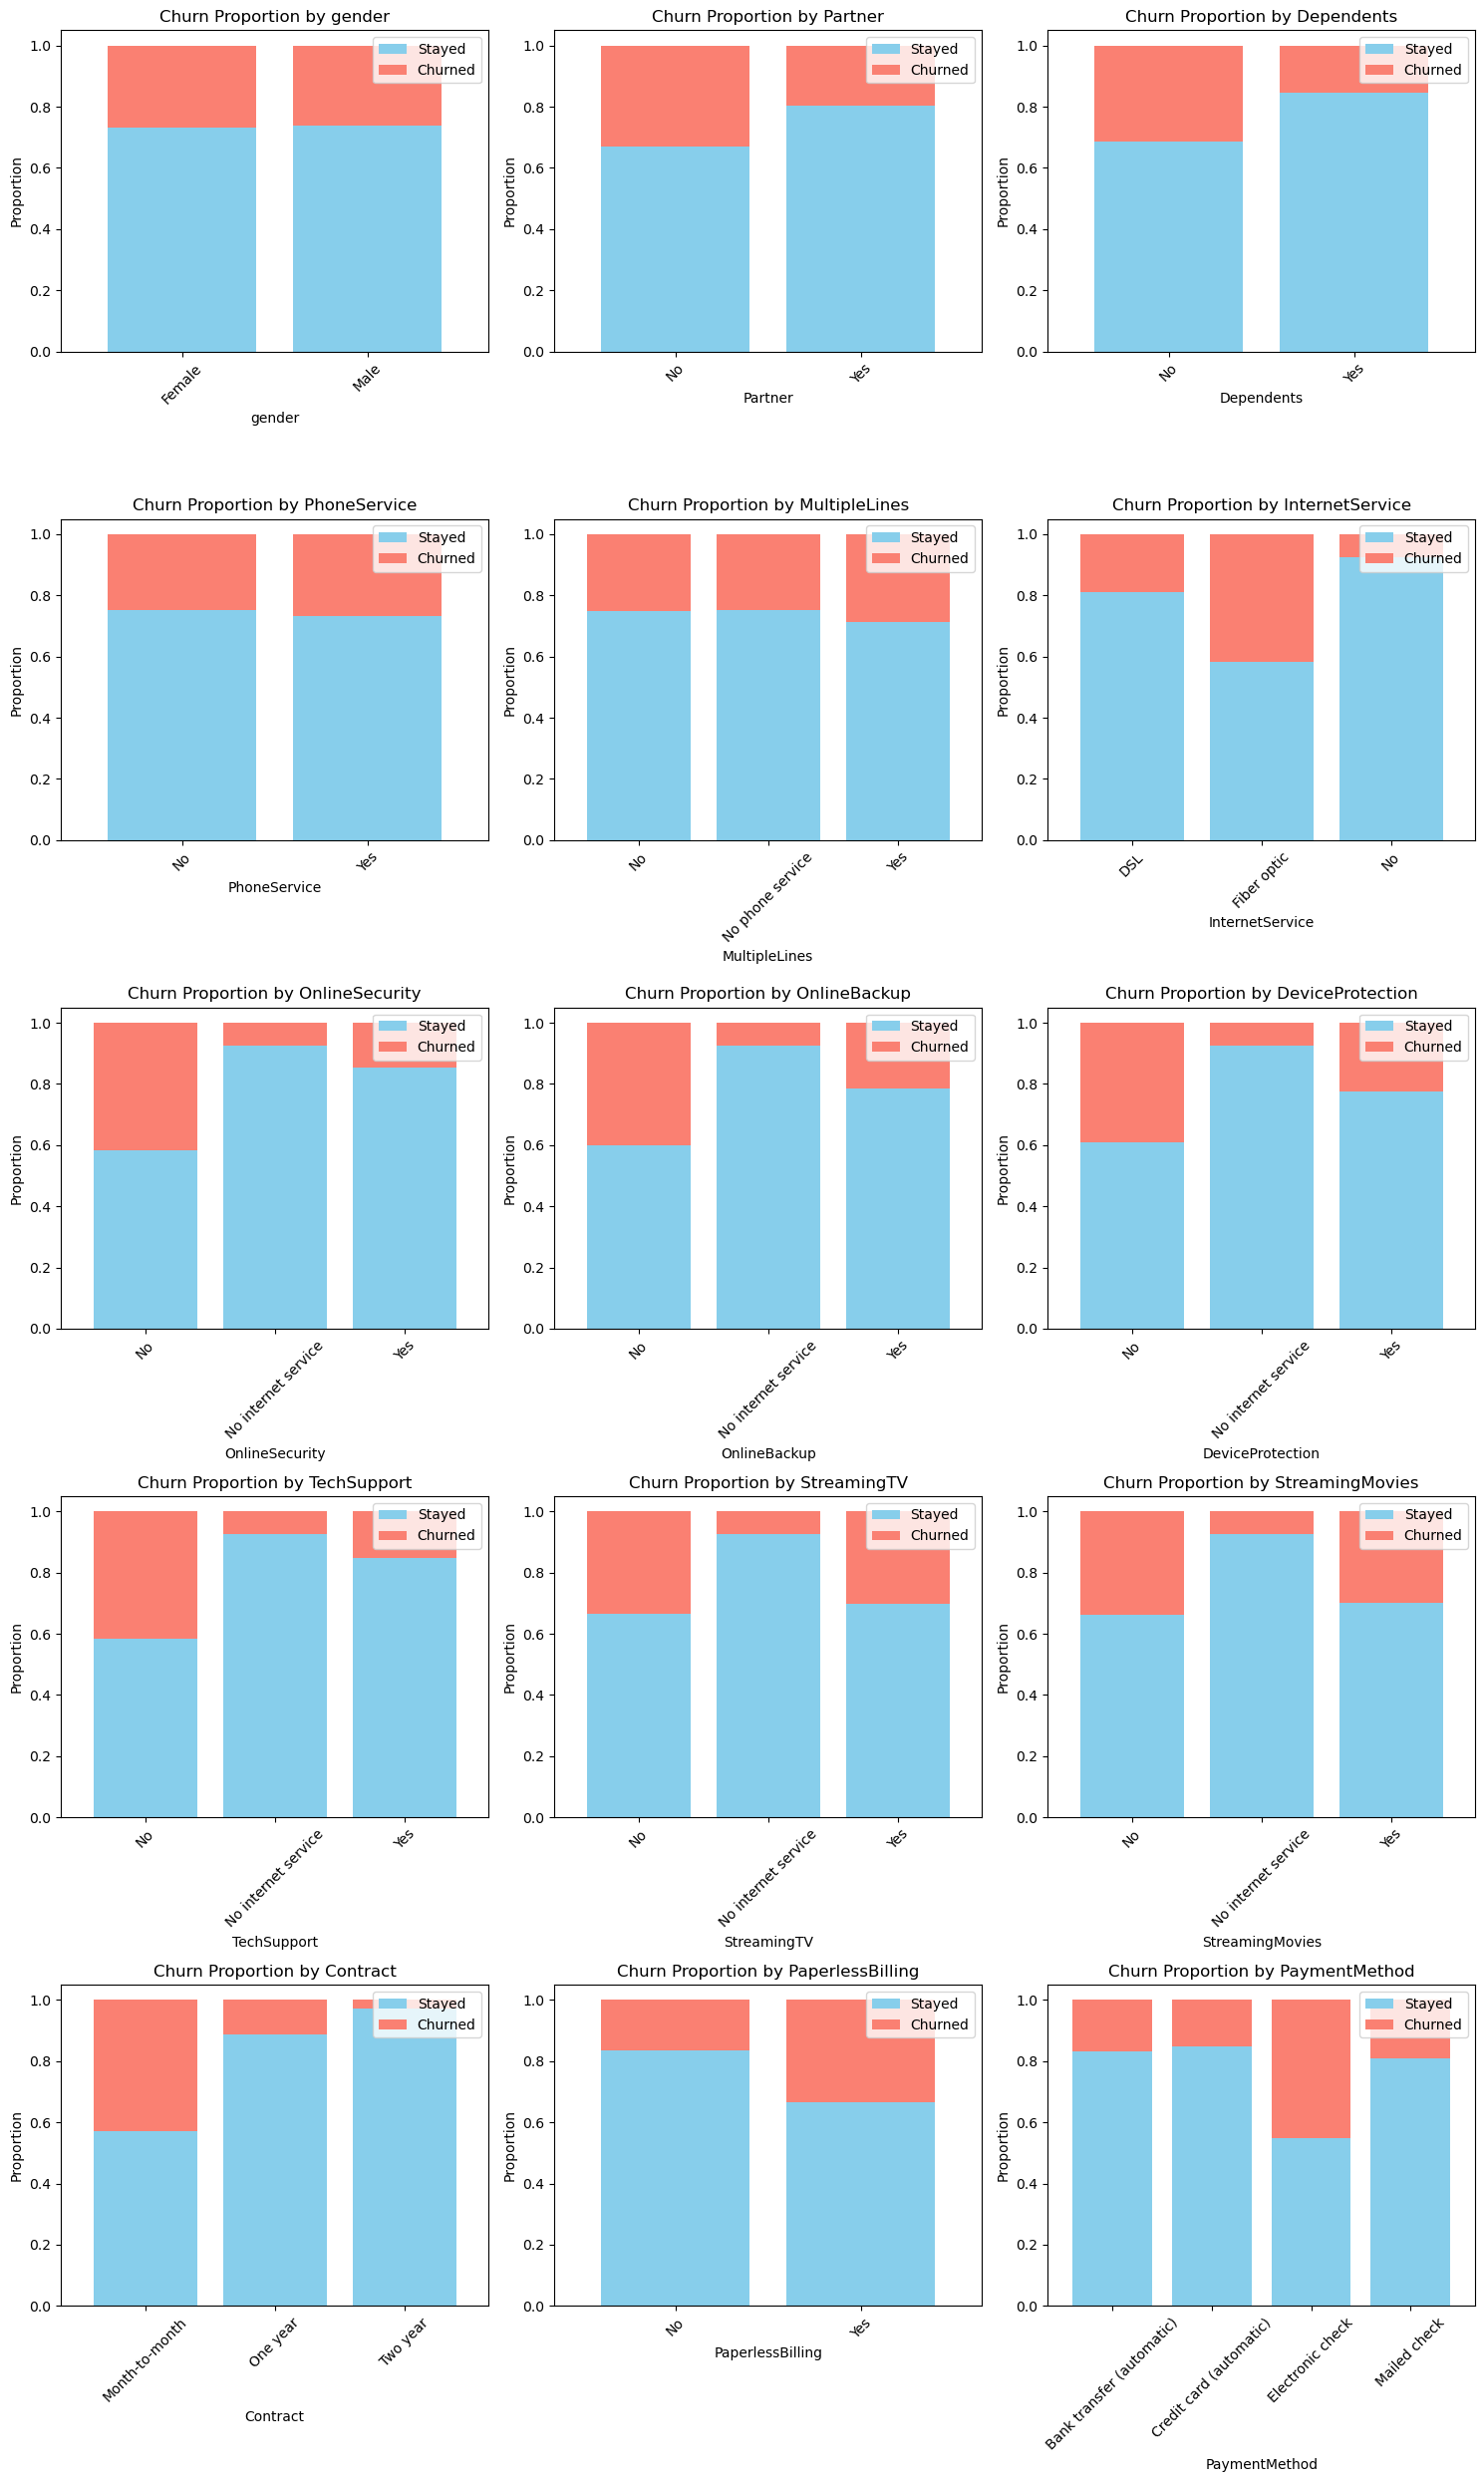

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns, excluding 'customerID'
categorical_columns = Customer_data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col != 'customerID']

# Set the number of rows and columns for the grid
num_plots = len(categorical_columns)
num_columns = 3  # You can adjust this based on how many columns you want per row
num_rows = (num_plots - 1) // num_columns  # Compute number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Step 1: For each categorical variable, create a cross-tabulation with Churn
for i, column in enumerate(categorical_columns):
    if column != 'Churn':  # We don't need to cross-tabulate Churn with itself
        ct = pd.crosstab(Customer_data[column], Customer_data['Churn'], normalize='index')

        # Step 2: Plot stacked bar chart
        ct.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], width=0.8, ax=axes[i])
        axes[i].set_title(f'Churn Proportion by {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Proportion')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(['Stayed', 'Churned'], loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Perform one-hot encoding for categorical variables

In [ ]:
Customer_data.dtypes #check column types
# columns are not the correct type. We need to convert them to the correct one

# Define the columns for which we want to apply one-hot encoding
one_hot_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'Churn'
]

# Perform one-hot encoding for specified columns
Customer_data = pd.get_dummies(Customer_data, columns=one_hot_columns, drop_first=True)
Customer_data.dtypes

### Check null values

In [ ]:
pd.set_option('display.max_rows', None)
print(Customer_data.isnull().sum()) #No null values found

In [60]:
Customer_data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True


In [61]:
categorical_columns = Customer_data.select_dtypes(include=['object', 'category']).columns.tolist()

In [66]:
boolean_columns = Customer_data.select_dtypes(include=['bool']).columns.tolist()
print(boolean_columns)

['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn_Yes']
